# Trabalho 1 - Regressão Multivariável
# Estimativa de preços de diamantes de acordo com suas características.

UFRJ/POLI/DEL - Introdução ao Aprendizado de Máquina (EEL891) <br>
Prof. Heraldo Almeira - Julho de 2019 <br>
Maria Gabriella Andrade Felgas (DRE: 111471809)

## Mineração e Análise de Dados

### Importando as Bibliotecas e Ferramentas

In [1]:
# Importando as bibliotecas e setando o ambiente de desenvolvimento

# Bibliotecas para processamento e manipulacao dos dados
import numpy as np
import pandas as pd

# Bibliotecas para visualizacao dos dados
import matplotlib.pyplot as plt
import seaborn as sns


# Bibliotecas dos modelos de treinamento
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor,\
                             GradientBoostingRegressor, AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor


# Bibliotecas de ferramentas e métricas
from sklearn.preprocessing import Imputer, Normalizer, scale, MinMaxScaler, StandardScaler, Imputer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error 

### Análise e Tratamento de Dados

### Carregando o conjunto de treino

In [2]:
# Carregando os dados de treino como dataframe
# e observando os atributos
train = pd.read_csv('data/train.csv')
train.head()

,id,carat,cut,color,clarity,x,y,z,depth,table,price
0,20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
1,20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
2,20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
3,20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
4,20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [3]:
# Verificando tamanho do dataframe
train.shape

(33940, 11)

In [4]:
# Verificando informacoes especificas
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33940 entries, 0 to 33939
Data columns (total 11 columns):
id         33940 non-null int64
carat      33940 non-null float64
cut        33940 non-null object
color      33940 non-null object
clarity    33940 non-null object
x          33940 non-null float64
y          33940 non-null float64
z          33940 non-null float64
depth      33940 non-null float64
table      33940 non-null float64
price      33940 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.8+ MB


In [5]:
# Setando o index do arquivo como arquivo do dataframe
train = train.set_index('id')
train.head()

,carat,cut,color,clarity,x,y,z,depth,table,price
id,,,,,,,,,,
20000,0.35,Very Good,G,VVS2,4.44,4.48,2.80,62.8,58.0,798
20001,0.70,Ideal,F,SI1,5.66,5.69,3.55,62.6,56.0,2089
20002,0.32,Ideal,F,VVS1,4.42,4.38,2.70,61.4,56.0,990
20003,0.30,Ideal,H,VVS2,4.32,4.35,2.67,61.7,54.2,631
20004,0.33,Premium,I,VVS2,4.41,4.47,2.76,62.2,59.0,579


In [6]:
# Verificando se existem valores nulos para o conjunto de treino
train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
price      0
dtype: int64

In [7]:
# Verificando os detalhes de cada caracteristica
train.describe()

,carat,x,y,z,depth,table,price
count,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000
mean,0.796249,5.727926,5.730563,3.535916,61.746491,57.467664,3920.022864
std,0.472866,1.119282,1.120279,0.693763,1.425570,2.237116,3980.229999
min,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,952.000000
50%,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2395.000000
75%,1.040000,6.540000,6.530000,4.030000,62.500000,59.000000,5294.000000
max,5.010000,10.740000,31.800000,6.980000,79.000000,95.000000,18823.000000


Como x, y e z são variáveis relacionadas às dimensões de cada diamante, não faz sentido que nenhuma delas seja igual a 0. Assim, é necessário retirar estes dados do conjunto de treino para que o modelo não seja prejudicado.

In [8]:
# Para realizar este processamento, redefine-se o conjunto de treino como o que corresponde a condicao a seguir
train = train[(train[['x','y','z']] != 0).all(axis=1)]

# Para confirmar
train.describe()

,carat,x,y,z,depth,table,price
count,33929.000000,33929.000000,33929.000000,33929.000000,33929.000000,33929.00000,33929.000000
mean,0.796061,5.728073,5.730722,3.537062,61.746754,57.46752,3918.401692
std,0.472740,1.117848,1.118862,0.690948,1.425311,2.23705,3978.347387
min,0.200000,3.730000,3.680000,1.070000,43.000000,44.00000,326.000000
25%,0.400000,4.710000,4.720000,2.910000,61.000000,56.00000,952.000000
50%,0.700000,5.690000,5.710000,3.520000,61.800000,57.00000,2394.000000
75%,1.040000,6.530000,6.530000,4.030000,62.500000,59.00000,5293.000000
max,5.010000,10.740000,31.800000,6.980000,79.000000,95.00000,18823.000000


### Carregando o conjunto de teste

In [9]:
# Carregando os dados de teste como dataframe
test = pd.read_csv('data/test.csv')
test.head()

,id,carat,cut,color,clarity,x,y,z,depth,table
0,0,1.82,Premium,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1,1.11,Very Good,H,SI1,6.63,6.65,4.11,61.9,58.0
2,2,0.52,Ideal,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,3,1.05,Ideal,I,VS2,6.52,6.50,4.05,62.2,56.0
4,4,0.70,Ideal,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [10]:
test.shape

(20000, 10)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
id         20000 non-null int64
carat      20000 non-null float64
cut        20000 non-null object
color      20000 non-null object
clarity    20000 non-null object
x          20000 non-null float64
y          20000 non-null float64
z          20000 non-null float64
depth      20000 non-null float64
table      20000 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [12]:
# Setando o index do arquivo como arquivo do dataframe
test = test.set_index('id')
test.head()

,carat,cut,color,clarity,x,y,z,depth,table
id,,,,,,,,,
0,1.82,Premium,G,SI1,7.75,7.68,4.84,62.7,58.0
1,1.11,Very Good,H,SI1,6.63,6.65,4.11,61.9,58.0
2,0.52,Ideal,D,VVS2,5.19,5.22,3.20,61.5,55.0
3,1.05,Ideal,I,VS2,6.52,6.50,4.05,62.2,56.0
4,0.70,Ideal,I,VVS2,5.63,5.68,3.51,62.1,58.0


In [13]:
# Verificando se existem valores nulos para o conjunto de teste
test.isnull().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
depth      0
table      0
dtype: int64

In [14]:
# Verificando os detalhes de cada caracteristica
test.describe()

,carat,x,y,z,depth,table
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,0.800809,5.736641,5.741252,3.543516,61.75435,57.439400
std,0.475947,1.125961,1.178295,0.725497,1.44453,2.229972
min,0.200000,0.000000,0.000000,0.000000,44.00000,43.000000
25%,0.400000,4.720000,4.730000,2.910000,61.00000,56.000000
50%,0.700000,5.700000,5.710000,3.530000,61.80000,57.000000
75%,1.050000,6.550000,6.540000,4.040000,62.50000,59.000000
max,3.670000,9.860000,58.900000,31.800000,79.00000,79.000000


Agora, verifica-se a distribuição de cada um dos atributos numéricos do dataset, verificando seus padrões e outliers.

### Tratamento dos dados

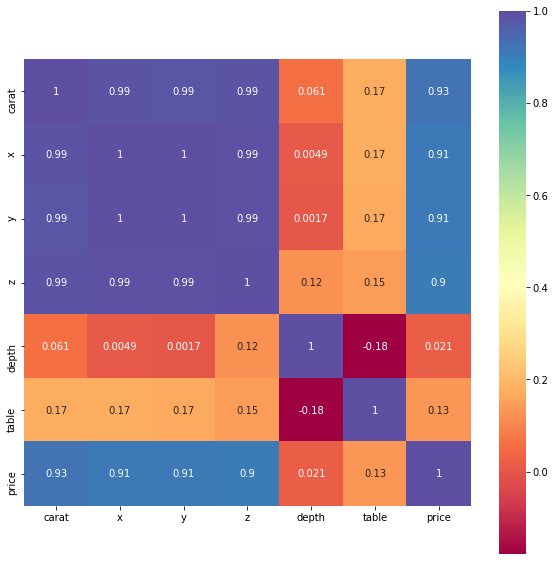

In [54]:
# Cria a matriz de correlacao entre os atributos numericos para visualizacao inicial
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

In [35]:
# Funcao de analise de atributo
def analysis(feature, hist=True):
    
    # Definindo os valores de Skewness e Kurtosis para analisar
    # a simetria e quantidade de outliers respectivamente
    print('Skewness: {}'.format(train[feature].skew()))
    print('Kurtosis: {}'.format(train[feature].kurt()))

    if hist:
        # Plotando o histograma
        plt.figure(figsize=(20,10))
        train[feature].hist(bins = 500)
        plt.show()
    
    if feature != 'price':
        # Plotando o diagrama de dispersão
        plt.figure(figsize=(20,10))
        train.plot.scatter(x = feature, y = 'price')
        plt.show()
        
        
# Funcao que checa a contagem para cada limiar    
def count_limit(feature, inf_limit, sup_limit, hop):
    
    n = int((sup_limit - inf_limit) / hop)
    p = np.zeros(((n + 1), 2))
    
    for i in range(n + 1):
        p[i][0] = train[train[feature] < (inf_limit + (hop * i))][feature].count()
        p[i][1] = np.round((p[i][0] / train[train[feature] < sup_limit][feature].count()) * 100, 2)
        print('Quantidade de pontos abaixo de {} :'.format(inf_limit + (hop * i)), p[i][0], \
              'Porcentagem: {} %'.format(p[i][1]))

### Preço

In [16]:
train['price'].describe()

count    33929.000000
mean      3918.401692
std       3978.347387
min        326.000000
25%        952.000000
50%       2394.000000
75%       5293.000000
max      18823.000000
Name: price, dtype: float64

Skewness: 1.6292963158992595
Kurtosis: 2.224956771069901


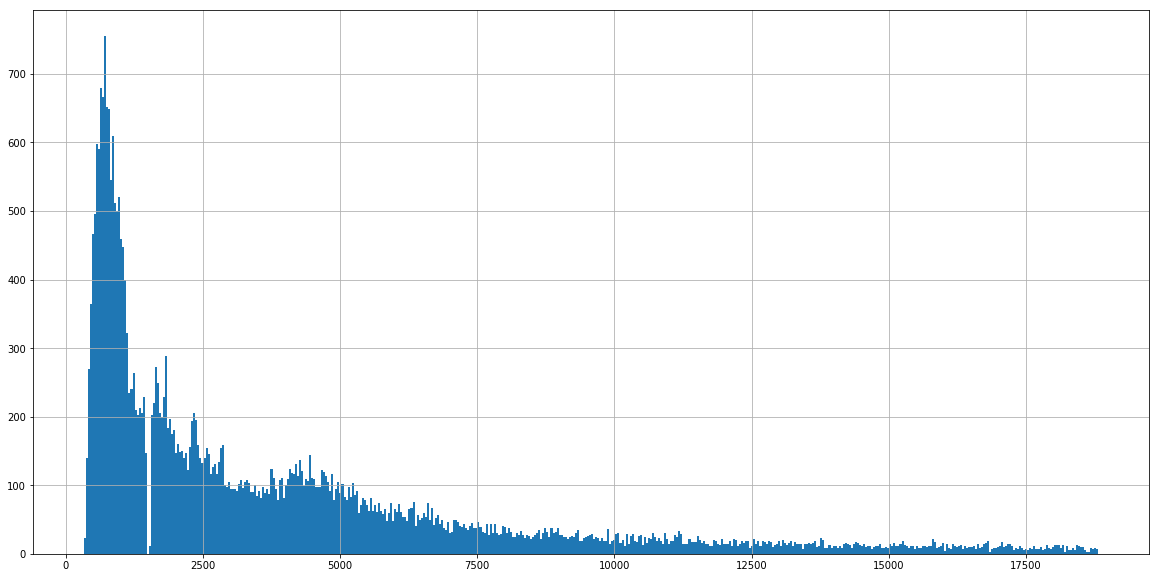

In [17]:
analysis('price')

In [18]:
count_limit('price', 2500, 20000, 2500)

7
Quantidade de pontos abaixo de 2500 : 17381.0 Porcentagem: 51.23 %
Quantidade de pontos abaixo de 5000 : 24717.0 Porcentagem: 72.85 %
Quantidade de pontos abaixo de 7500 : 28734.0 Porcentagem: 84.69 %
Quantidade de pontos abaixo de 10000 : 30664.0 Porcentagem: 90.38 %
Quantidade de pontos abaixo de 12500 : 31976.0 Porcentagem: 94.24 %
Quantidade de pontos abaixo de 15000 : 32881.0 Porcentagem: 96.91 %
Quantidade de pontos abaixo de 17500 : 33630.0 Porcentagem: 99.12 %
Quantidade de pontos abaixo de 20000 : 33929.0 Porcentagem: 100.0 %


#### Removendo os outliers

De acordo com os resultados acima, decidi remover os dados com preço acima de 10000.

Skewness: 1.037656952718639
Kurtosis: 0.15282772697750557


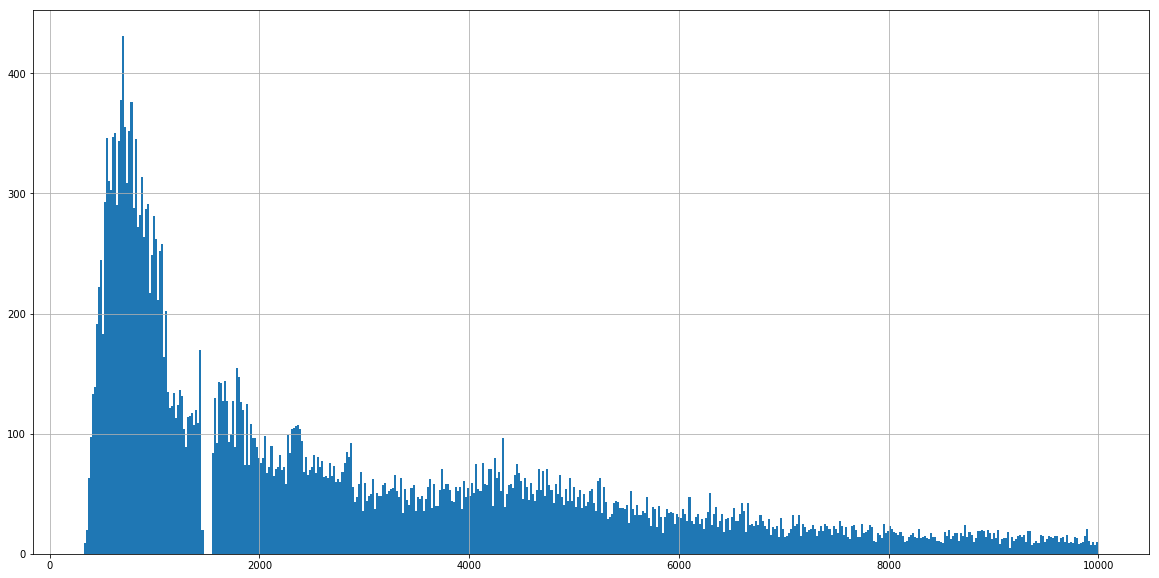

In [19]:
train = train[train['price'] < 10000]

analysis('price')

### Carat

In [20]:
train['carat'].describe()

count    30664.000000
mean         0.695621
std          0.356180
min          0.200000
25%          0.380000
50%          0.600000
75%          1.010000
max          3.110000
Name: carat, dtype: float64

Skewness: 0.7399809602412537
Kurtosis: 0.041240826113170925


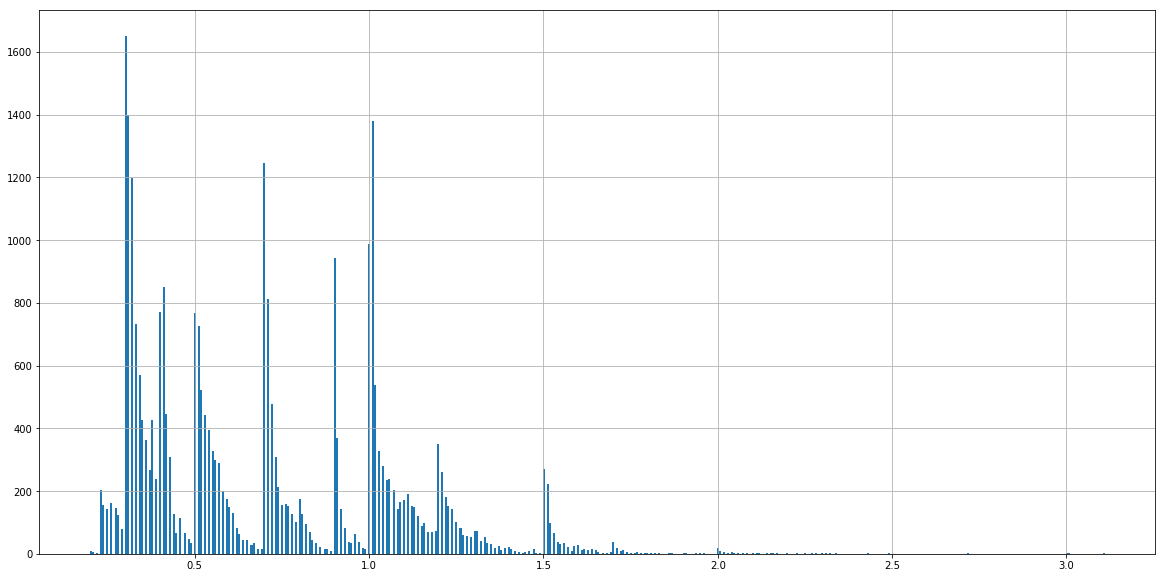

<Figure size 1440x720 with 0 Axes>

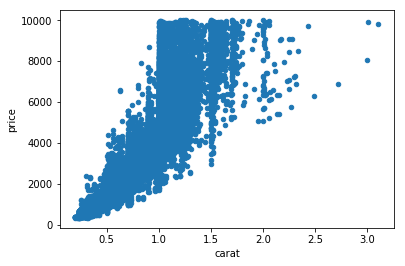

In [21]:
analysis('carat')

In [22]:
count_limit('carat', 0.5, 3, 0.5)

5
Quantidade de pontos abaixo de 0.5 : 11121.0 Porcentagem: 36.27 %
Quantidade de pontos abaixo de 1.0 : 21961.0 Porcentagem: 71.63 %
Quantidade de pontos abaixo de 1.5 : 29547.0 Porcentagem: 96.37 %
Quantidade de pontos abaixo de 2.0 : 30588.0 Porcentagem: 99.76 %
Quantidade de pontos abaixo de 2.5 : 30660.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 3.0 : 30661.0 Porcentagem: 100.0 %


#### Removendo os outliers

De acordo com a observação do gráfico acima e da quantidade de dados acumulados, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com *carat* acima de 2. Além disso, é importante observar o comportamento espaçado do atributo, assumindo conjuntos de valores a partir de determinadas "linhas bem definidas". Por conta desta característica, divido o atributo em 4 novos atributos diferentes.

Skewness: 0.6293850364084281
Kurtosis: -0.5336235339325448


<Figure size 1440x720 with 0 Axes>

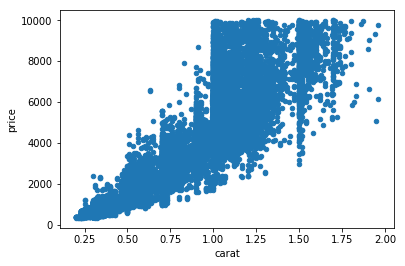

In [23]:
train = train[train['carat'] < 2]

analysis('carat', hist=False)

### x

In [24]:
train['x'].describe()

count    30588.000000
mean         5.514622
std          0.942808
min          3.730000
25%          4.640000
50%          5.420000
75%          6.370000
max          8.100000
Name: x, dtype: float64

Skewness: 0.21059669549092613
Kurtosis: -1.1374273541601116


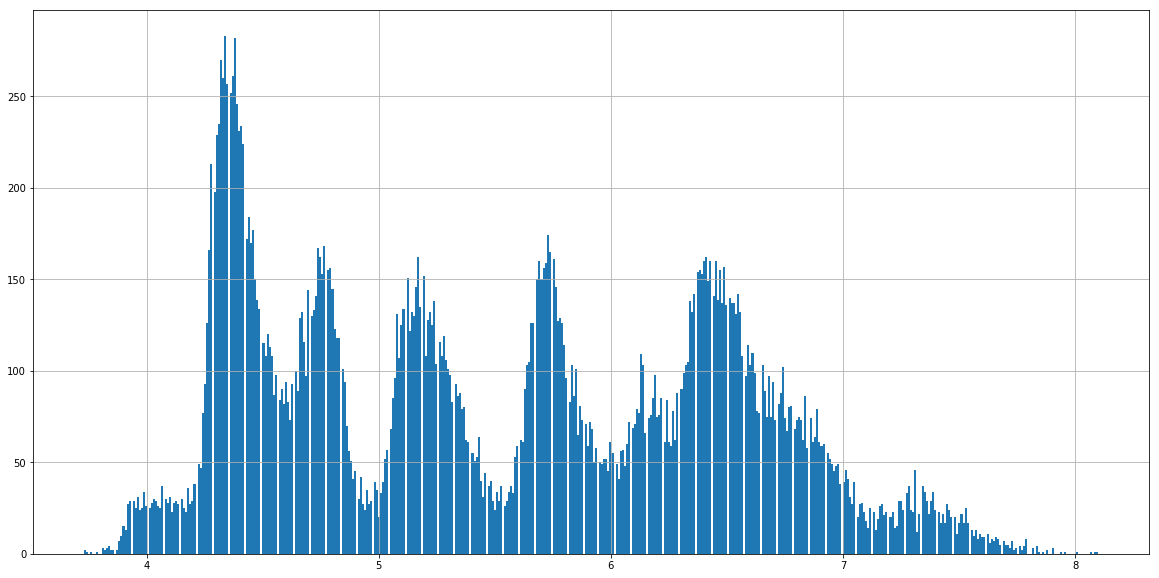

<Figure size 1440x720 with 0 Axes>

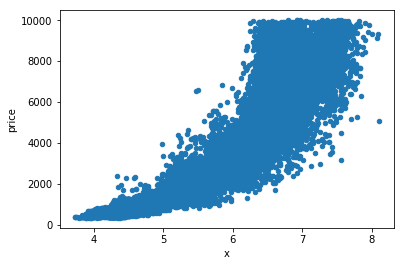

In [25]:
analysis('x')

In [26]:
count_limit('x', 4, 9, 1)

5
Quantidade de pontos abaixo de 4 : 292.0 Porcentagem: 0.95 %
Quantidade de pontos abaixo de 5 : 11051.0 Porcentagem: 36.13 %
Quantidade de pontos abaixo de 6 : 19886.0 Porcentagem: 65.01 %
Quantidade de pontos abaixo de 7 : 29022.0 Porcentagem: 94.88 %
Quantidade de pontos abaixo de 8 : 30584.0 Porcentagem: 99.99 %
Quantidade de pontos abaixo de 9 : 30588.0 Porcentagem: 100.0 %


#### Removendo os outliers

De acordo com a observação do gráfico acima e da distribuição de *x*, não é necessário remover outliers para este atributo.

### y

In [27]:
train['y'].describe()

count    30588.000000
mean         5.518455
std          0.947701
min          3.680000
25%          4.647500
50%          5.430000
75%          6.370000
max         31.800000
Name: y, dtype: float64

Skewness: 0.8913806421746344
Kurtosis: 18.09995433352929


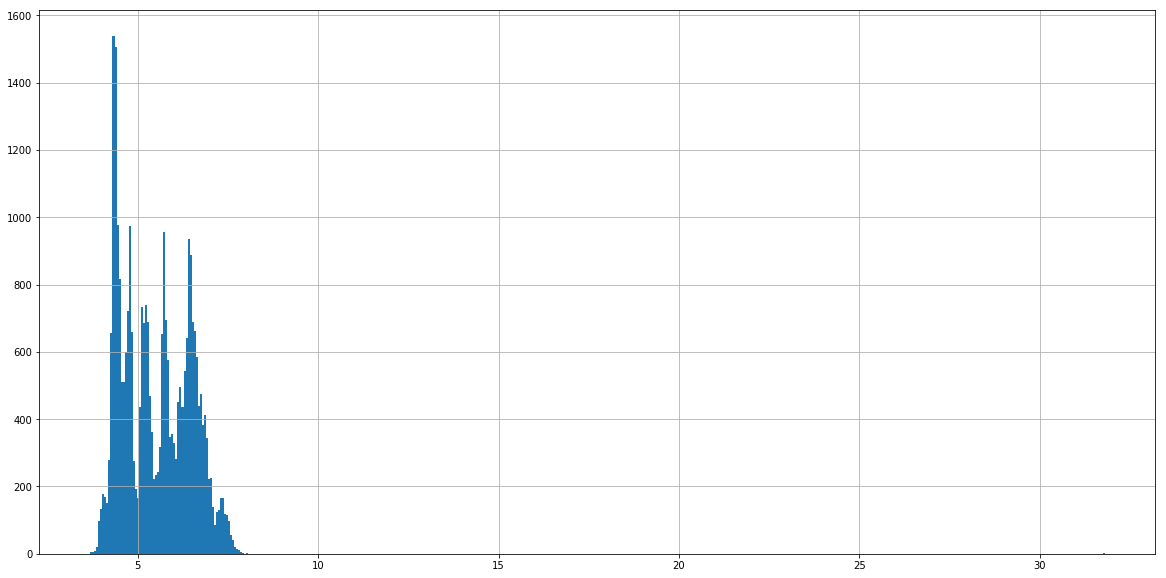

<Figure size 1440x720 with 0 Axes>

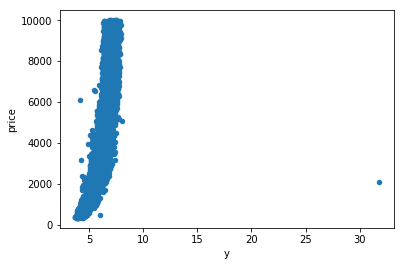

In [28]:
analysis('y')

In [29]:
count_limit('y', 5, 35, 5)

6
Quantidade de pontos abaixo de 5 : 11044.0 Porcentagem: 36.11 %
Quantidade de pontos abaixo de 10 : 30587.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 15 : 30587.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 20 : 30587.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 25 : 30587.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 30 : 30587.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 35 : 30588.0 Porcentagem: 100.0 %


#### Removendo os outliers

De acordo com a observação do gráfico acima e da distribuição de *y*, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com y acima de 10.

Skewness: 0.2043727803800846
Kurtosis: -1.1478194436649118


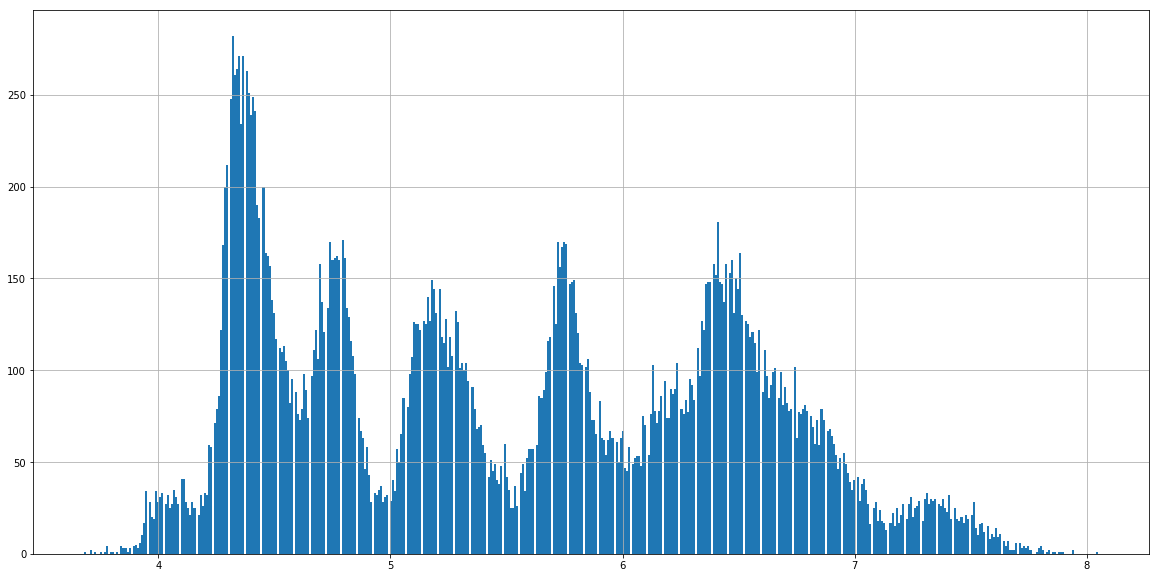

<Figure size 1440x720 with 0 Axes>

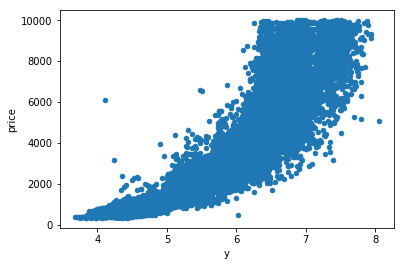

In [30]:
train = train[train['y'] < 10]

analysis('y')

### z

In [32]:
train['z'].describe()

count    30587.000000
mean         3.405849
std          0.583980
min          1.070000
25%          2.850000
50%          3.340000
75%          3.950000
max          5.080000
Name: z, dtype: float64

Skewness: 0.2073646157461095
Kurtosis: -1.1283192670963242


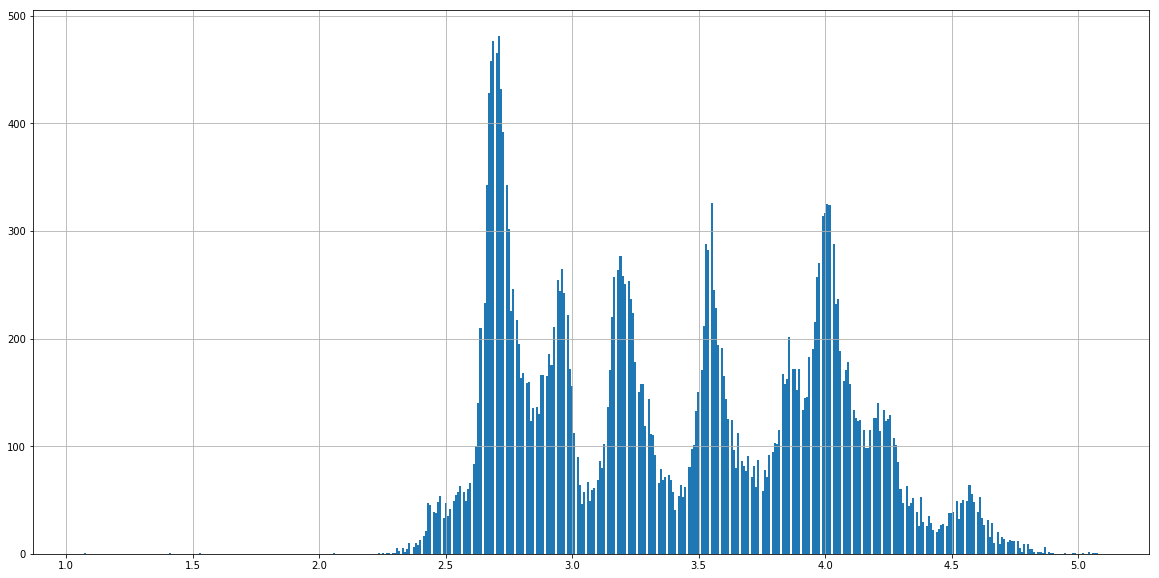

<Figure size 1440x720 with 0 Axes>

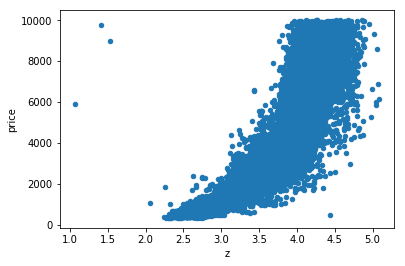

In [33]:
analysis('z')

In [34]:
count_limit('z', 1, 6, 0.5)

10
Quantidade de pontos abaixo de 1.0 : 0.0 Porcentagem: 0.0 %
Quantidade de pontos abaixo de 1.5 : 2.0 Porcentagem: 0.01 %
Quantidade de pontos abaixo de 2.0 : 3.0 Porcentagem: 0.01 %
Quantidade de pontos abaixo de 2.5 : 418.0 Porcentagem: 1.37 %
Quantidade de pontos abaixo de 3.0 : 10410.0 Porcentagem: 34.03 %
Quantidade de pontos abaixo de 3.5 : 16446.0 Porcentagem: 53.77 %
Quantidade de pontos abaixo de 4.0 : 24141.0 Porcentagem: 78.93 %
Quantidade de pontos abaixo de 4.5 : 29699.0 Porcentagem: 97.1 %
Quantidade de pontos abaixo de 5.0 : 30581.0 Porcentagem: 99.98 %
Quantidade de pontos abaixo de 5.5 : 30587.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 6.0 : 30587.0 Porcentagem: 100.0 %


#### Removendo os outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com z abaixo de 2.3 e acima de 5.

Skewness: 0.20965326157579836
Kurtosis: -1.148179854427178


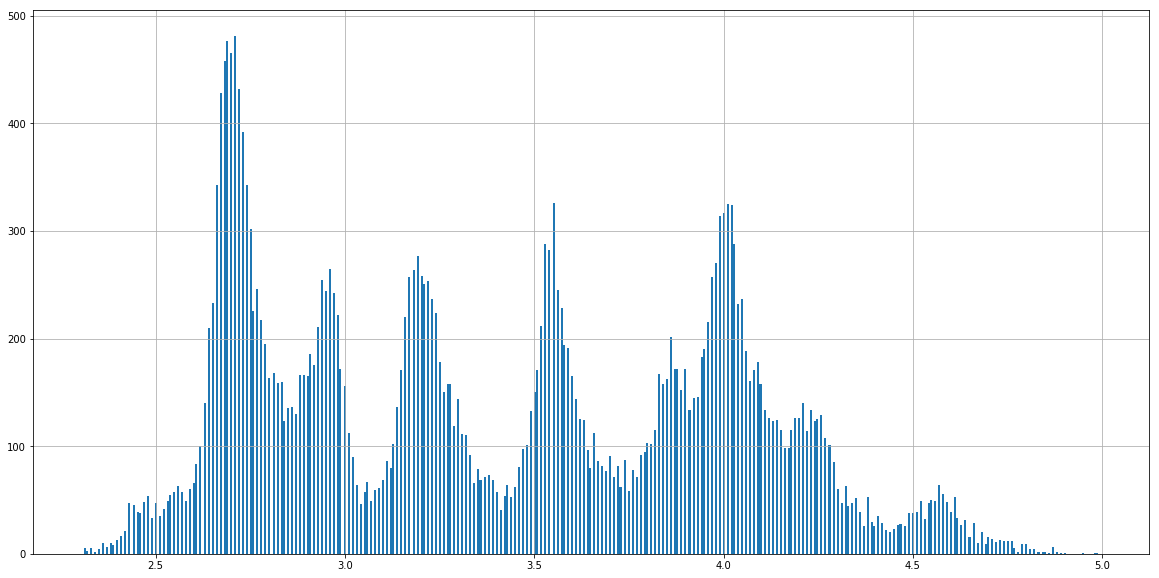

<Figure size 1440x720 with 0 Axes>

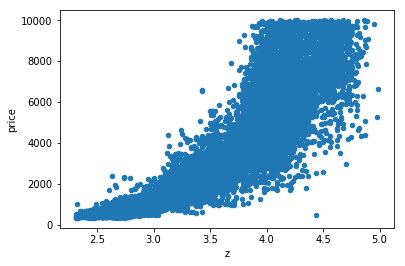

In [37]:
train = train[train['z'] > 2.3]
train = train[train['z'] < 5]

analysis('z')

### depth

In [38]:
train['depth'].describe()

count    30571.000000
mean        61.751179
std          1.414657
min         43.000000
25%         61.100000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

Skewness: -0.1841289379406292
Kurtosis: 5.910082399653874


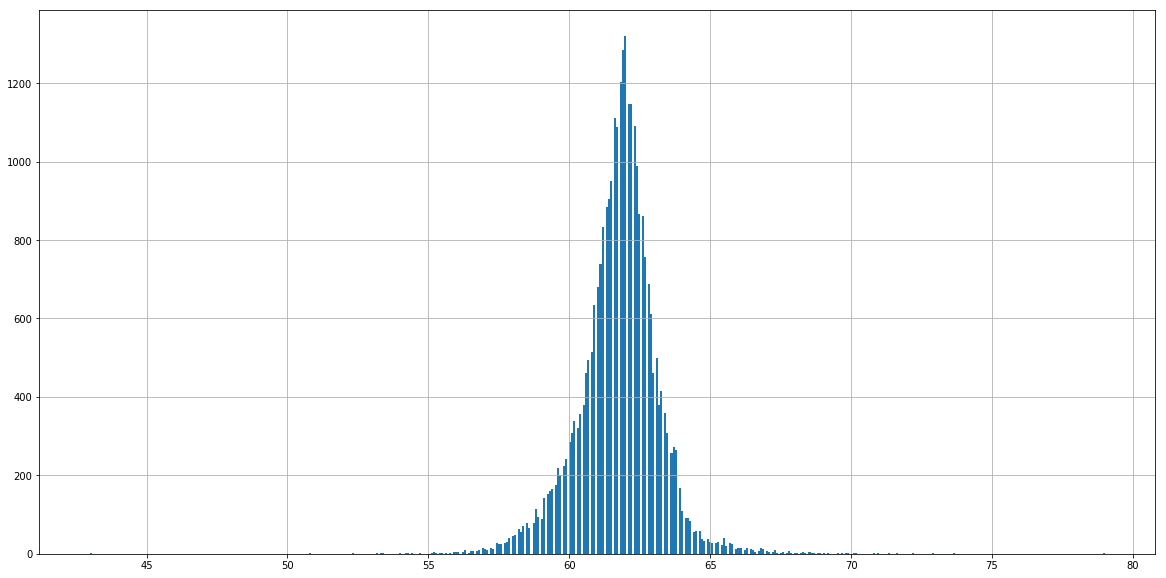

<Figure size 1440x720 with 0 Axes>

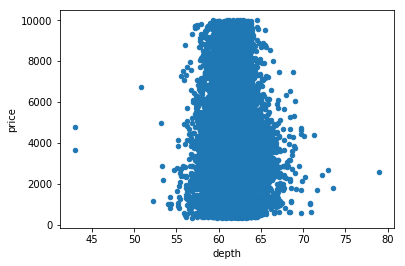

In [40]:
analysis('depth')

In [41]:
count_limit('depth', 45, 80, 5)

Quantidade de pontos abaixo de 45 : 2.0 Porcentagem: 0.01 %
Quantidade de pontos abaixo de 50 : 2.0 Porcentagem: 0.01 %
Quantidade de pontos abaixo de 55 : 13.0 Porcentagem: 0.04 %
Quantidade de pontos abaixo de 60 : 2819.0 Porcentagem: 9.22 %
Quantidade de pontos abaixo de 65 : 30107.0 Porcentagem: 98.48 %
Quantidade de pontos abaixo de 70 : 30560.0 Porcentagem: 99.96 %
Quantidade de pontos abaixo de 75 : 30570.0 Porcentagem: 100.0 %
Quantidade de pontos abaixo de 80 : 30571.0 Porcentagem: 100.0 %


#### Removendo os outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com depth entre 56 e 67.

Skewness: -0.3269895356882298
Kurtosis: 1.4109083743998578


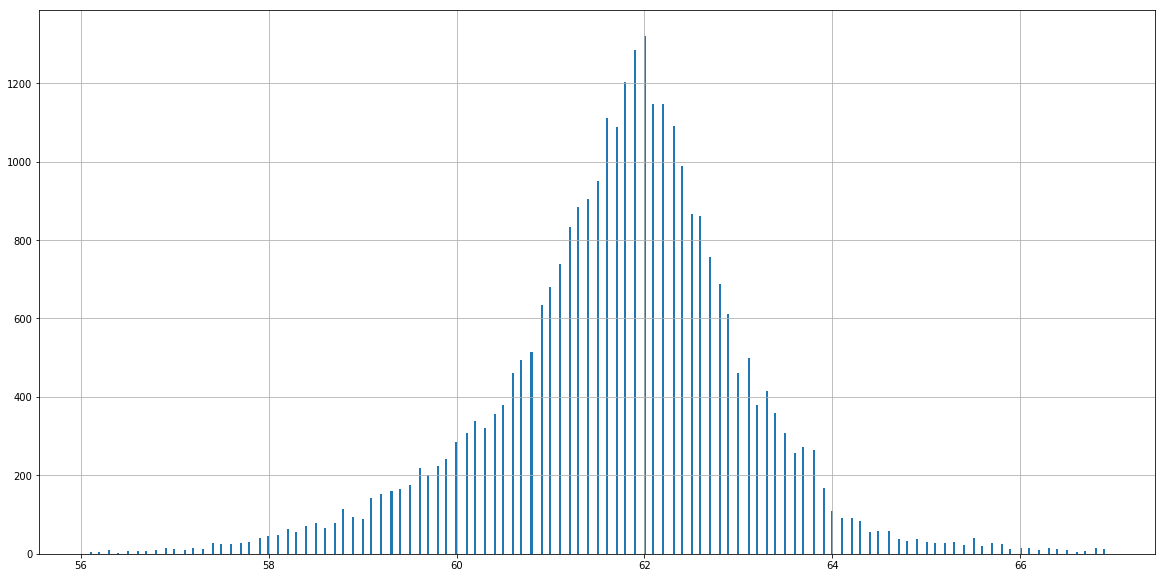

<Figure size 1440x720 with 0 Axes>

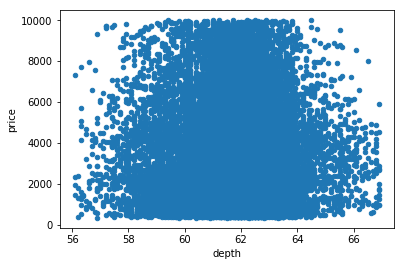

In [42]:
train = train[train['depth'] > 56]
train = train[train['depth'] < 67]

analysis('depth')

### table

In [45]:
train['table'].describe()

count    30441.000000
mean        57.408574
std          2.211580
min         44.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         76.000000
Name: table, dtype: float64

Skewness: 0.67248514253496
Kurtosis: 0.9724423822975128


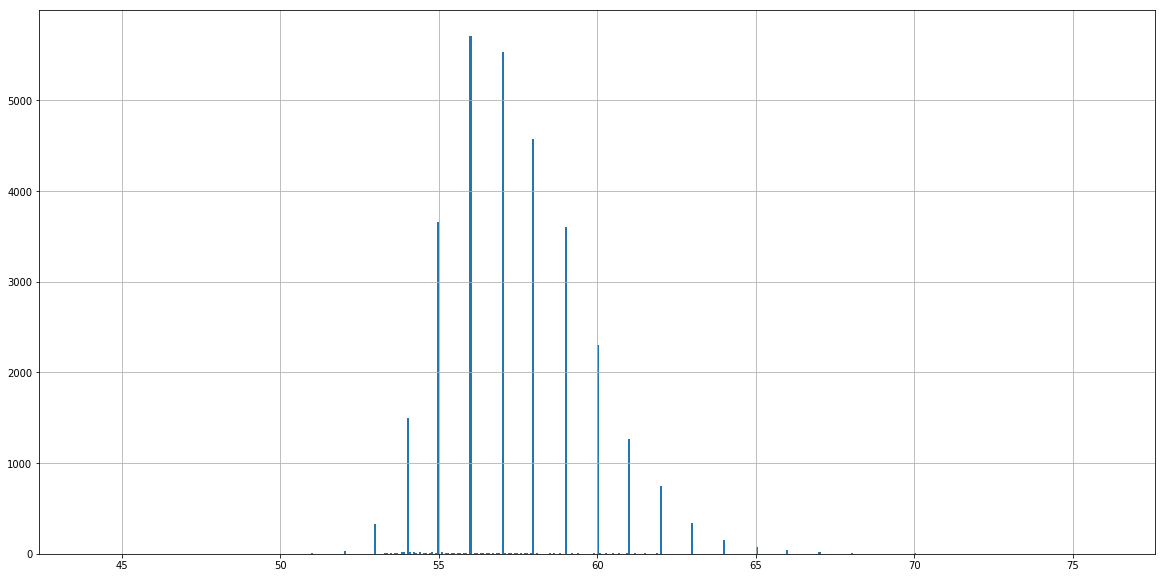

<Figure size 1440x720 with 0 Axes>

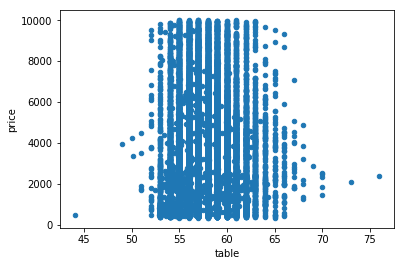

In [46]:
analysis('table')

In [47]:
count_limit('table', 45, 75, 5)

Quantidade de pontos abaixo de 45 : 1.0 Porcentagem: 0.0 %
Quantidade de pontos abaixo de 50 : 2.0 Porcentagem: 0.01 %
Quantidade de pontos abaixo de 55 : 2076.0 Porcentagem: 6.82 %
Quantidade de pontos abaixo de 60 : 25429.0 Porcentagem: 83.54 %
Quantidade de pontos abaixo de 65 : 30295.0 Porcentagem: 99.52 %
Quantidade de pontos abaixo de 70 : 30434.0 Porcentagem: 99.98 %
Quantidade de pontos abaixo de 75 : 30440.0 Porcentagem: 100.0 %


#### Removendo os outliers

De acordo com a observação do gráfico acima, defino os outliers como sendo os pontos fora da distribuição padrão, ou seja, com table entre 54 e 61.

Skewness: 0.23249534154858628
Kurtosis: -0.9554618995484545


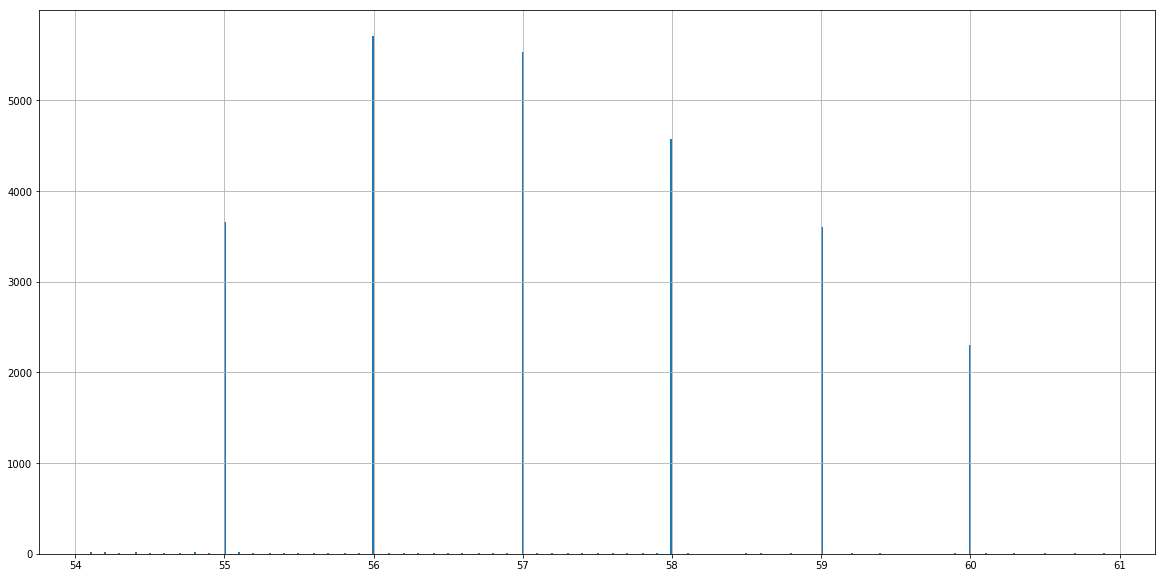

<Figure size 1440x720 with 0 Axes>

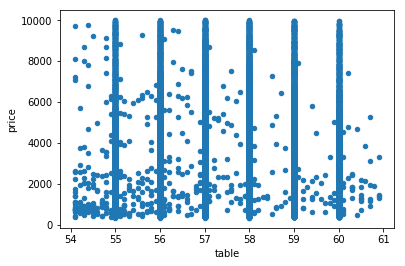

In [49]:
train = train[train['table'] > 54]
train = train[train['table'] < 61]

analysis('table')

### Outras observações

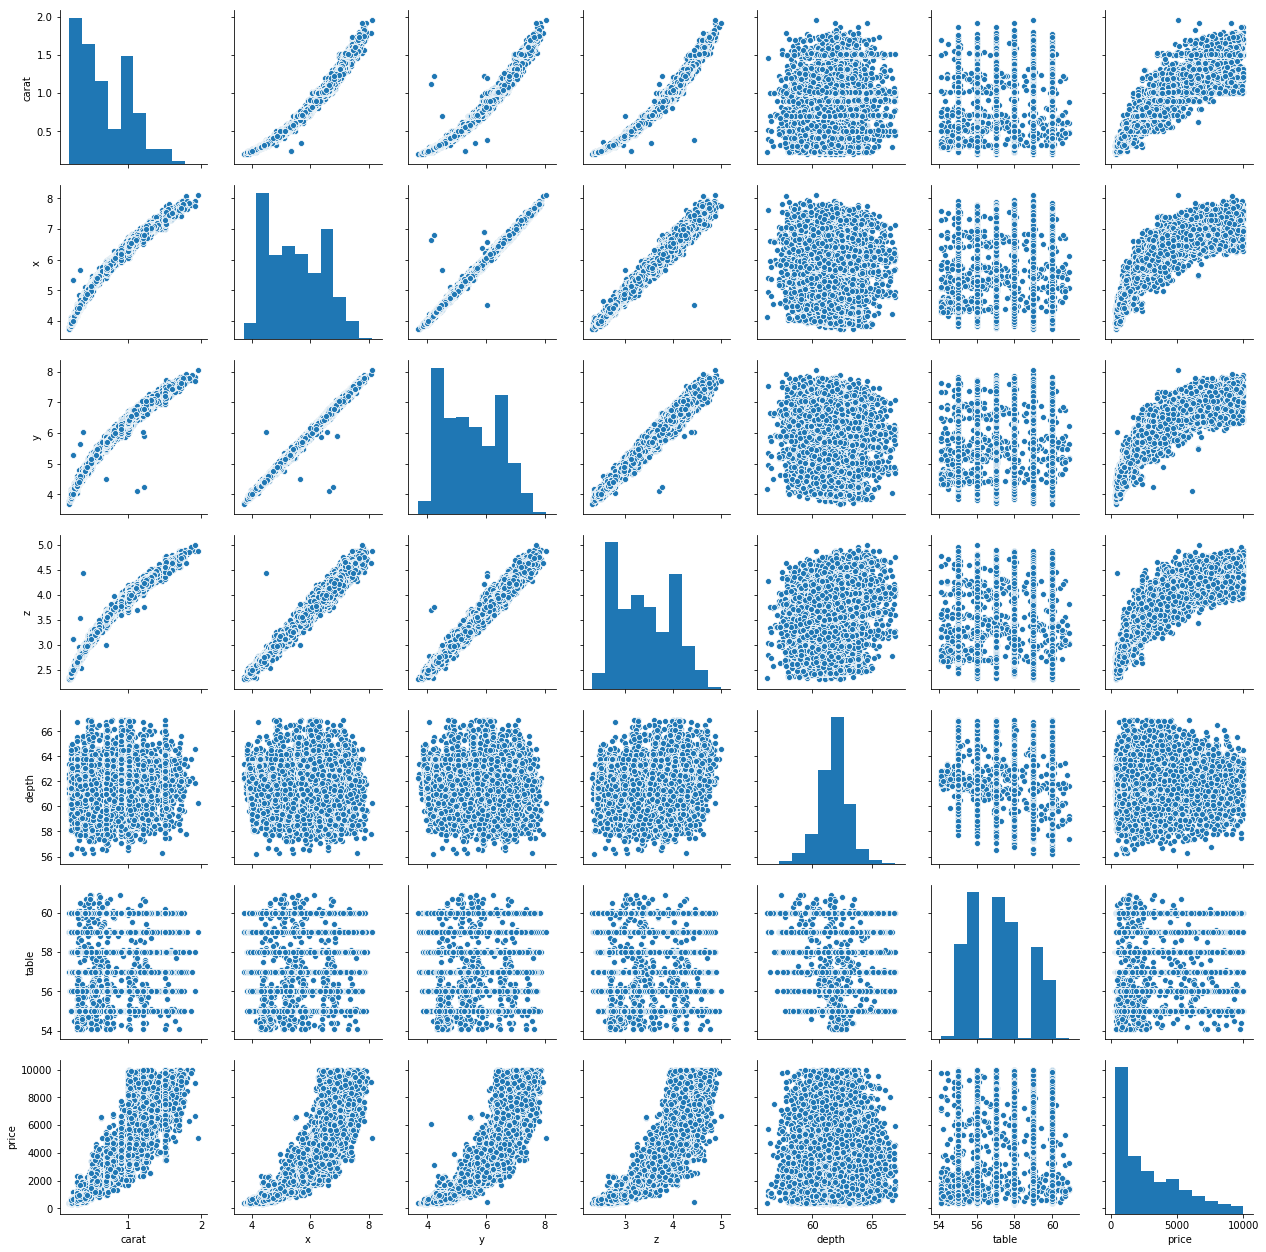

In [52]:
# Criando os graficos de dispersao para visualizacao geral

sns.pairplot(train)

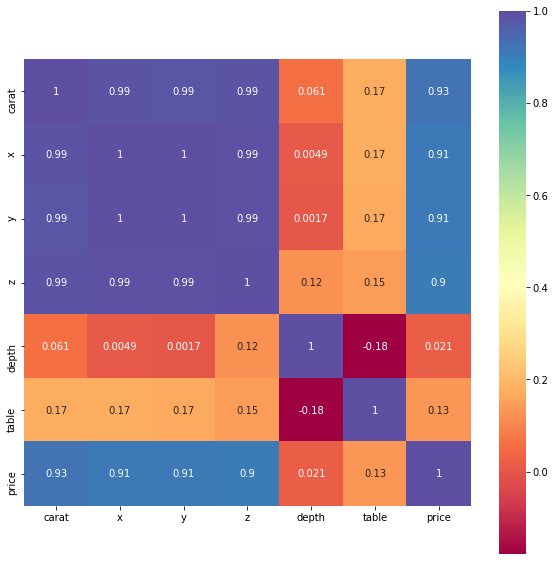

In [53]:
# Cria a matriz de correlacao entre os atributos numericos
corr_matrix = train.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

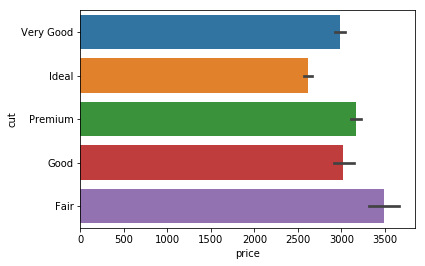

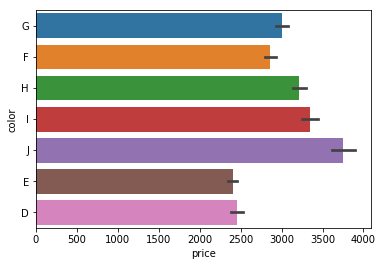

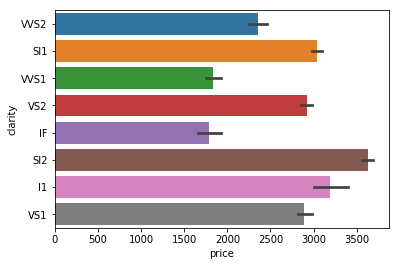

In [55]:
# Relacionando os atributos literais ao preco, com visualizacao

# Analisando a influencia de cut
sns.barplot(x = "price", y = "cut", data = train)
plt.show()

# Analisando a influencia de color
sns.barplot(x = "price", y = "color", data = train)
plt.show()

# Analisando a influencia de clarity
sns.barplot(x = "price", y = "clarity", data = train)
plt.show()

Como pode ser observado nos gráficos acima, as opções de cada um dos atributos influenciam o preço de maneiras diferentes. As barras coloridas significam o valor estimado para cada opção e a linha ao final de cada barra informa a incerteza destas estimativas.

Por conta deste fenomeno, decidiu-se lidar com estes atributos da seguinte maneira:
- Atribuindo valores numéricos de acordo com a influência sobre o preço, ou seja, de acordo com o valor esperado de preço para cada categoria.

Esta opção foi escolhida pois apresentou melhores resultados em comparação com a utilização de *Hot Encoding* e está descrita pela função abaixo:

In [71]:
def categ_feature(feature):
    mean = train.groupby(feature)['price'].mean()
    means_sort = mean.reset_index().sort_values(['price']).set_index([feature])
    means_sort.to_dict()
    
    return means_sort
    
means_sort = categ_feature('cut')

means_sort.info()

# train_aux = train.copy()
# train_aux['cut'] = train_aux['cut'].replace(means_sort, inplace = False)
# train_aux.head()

# print(cut_mean.reset_index().sort_values(['price']).set_index(['cut']))
# print(color_mean.reset_index().sort_values(['price']).set_index(['color']))
# print(clarity_mean.reset_index().sort_values(['price']).set_index(['clarity']))

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Ideal to Fair
Data columns (total 1 columns):
price    5 non-null float64
dtypes: float64(1)
memory usage: 80.0+ bytes


In [ ]:
# Integer encoding
cut_obj = {'Ideal': 3463, 
       'Good': 3871, 
       'Very Good': 3946, 
       'Fair': 4368, 
       'Premium': 4571}

color_obj = {'E': 3096, 
         'D': 3227, 
         'F': 3696, 
         'G': 4008, 
         'H': 4410, 
         'I': 5058, 
         'J': 5243}

clarity_obj = {'VVS1': 2559, 
           'IF': 2887, 
           'VVS2': 3257, 
           'VS1': 3826, 
           'VS2': 3892,
           'I1': 3966, 
           'SI1': 3971, 
           'SI2': 5087}

ds['cut'] = ds['cut'].replace(cut_obj, inplace = False)
ds['color'] = ds['color'].replace(color_obj, inplace = False)
ds['clarity'] = ds['clarity'].replace(clarity_obj, inplace = False)

# Reproduzindo para o x_kaggle que será usado ao final para envio das predições
x_kaggle['cut'] = x_kaggle['cut'].replace(cut_obj, inplace = False)
x_kaggle['color'] = x_kaggle['color'].replace(color_obj, inplace = False)
x_kaggle['clarity'] = x_kaggle['clarity'].replace(clarity_obj, inplace = False)

In [ ]:
# Substituindo os valores dos atributos de acordo com a observacao acima para o conjunto de treino

# cut
train_2['cut'] = train_2['cut'].replace({'Ideal': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4, 'Premium': 5})

# color
train_2['color'] = train_2['color'].replace({'E': 1, 'D': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7})

# clarity
train_2['clarity'] = train_2['clarity'].replace({'VVS1': 1, 'IF': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, \
                                                 'SI1': 6, 'I1': 7, 'SI2': 8})

train_2.head()

In [ ]:
# Substituindo os valores dos atributos de acordo com a observacao acima para o conjunto de teste

# test_2 eh referente a segunda alternativa de tratamento dos atributos literais
test_2 = test.copy()

# cut
test_2['cut'] = test_2['cut'].replace({'Ideal': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4, 'Premium': 5}, inplace = False)

# color
test_2['color'] = test_2['color'].replace({'E': 1, 'D': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}, inplace = False)

# clarity
test_2['clarity'] = test_2['clarity'].replace({'VVS1': 1, 'IF': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, \
                                                 'SI1': 6, 'I1': 7, 'SI2': 8}, inplace = False)

test_2.head()

In [ ]:
# Criando a matriz de correlacao para o segundo tratamento
corr_matrix_2 = train_2.corr()

plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix_2, square=True, cbar=True, annot = True, cmap='Spectral')
plt.show()

In [ ]:
# Criando o conjunto de treino e de teste a partir do conjunto da primeira alternativa

x_1 = train_1.drop(['price'], axis = 1)
y_1 = train_1['price']

x_pol_1 = train_pol_1.drop(['price'], axis = 1)
y_pol_1 = train_pol_1['price']


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, random_state = 2, test_size=0.3)

X_train_pol_1, X_test_pol_1, y_train_pol_1, y_test_pol_1 = train_test_split(x_pol_1, y_pol_1, random_state = 2, test_size=0.3)

In [ ]:
# Verificando o conjunto de treino

X_train_1.head()

In [ ]:
# Verificando o conjunto de teste

X_test_1.head()

In [ ]:
# Criando o conjunto de treino e de teste a partir da segunda alternativa

x_2 = train_2.drop(['price'], axis = 1)
y_2 = train_2['price']

x_pol_2 = train_pol_2.drop(['price'], axis = 1)
y_pol_2 = train_pol_2['price']


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, random_state = 2, test_size=0.3)

X_train_pol_2, X_test_pol_2, y_train_pol_2, y_test_pol_2 = train_test_split(x_pol_2, y_pol_2, random_state = 2, test_size=0.3)

In [ ]:
# Verificando o conjunto de treino

X_train_2.head()

In [ ]:
# Verificando o conjunto de teste

X_test_2.head()